In [2]:
import os
import sys
from scgt import GeoTiff
sys.path.append('/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/')
sys.path.append('/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/ecoscape-connectivity/')
from EcoLinker.EcoLinker.restorationOptimizer import restorationOptimizer, defecitRestoration, lowResDefecitRestoration, probalisticDeficitRestoration, noisyDefecitRestoration, utopianRestoration
from ecoscape_connectivity_local import repopulation, util
import matplotlib.pyplot as plt
import ecoscape_connectivity
from scgt import GeoTiff, Tile
import numpy as np
import torch
import rasterio

In [14]:
DATA_PATH="/Users/nvalett/Documents/Natalie/Species Dist Research/Thesis/EcoLinker/tests/assets"
HABITAT_PATH = os.path.join(DATA_PATH, "smol/hab_smol.tif")
TERRAIN_PATH = os.path.join(DATA_PATH, "smol/terrain.tif")
RESTORED_TERRAIN_PATH = os.path.join(DATA_PATH, "smol/restored_ter_smol.tif")
PERMEABILITY_PATH = os.path.join(DATA_PATH, "paper_repro/transmission_refined_1.csv")

CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop.tif")
NOISY_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop_noisy.tif")
UTOPIAN_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop_utopian.tif")
RESTORED_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop_after_restoration.tif")
FLOW_PATH = os.path.join(DATA_PATH, "smol/grad.tif")
NOISY_FLOW_PATH = os.path.join(DATA_PATH, "smol/grad_noisy.tif")
UTOPIAN_FLOW_PATH = os.path.join(DATA_PATH, "smol/grad_utopian.tif")
RESTORED_FLOW_PATH = os.path.join(DATA_PATH, "smol/grad_after_restoration.tif")
DEATH_PATH = os.path.join(DATA_PATH, "smol/death.tif")
LOW_RES_DEATH_PATH = os.path.join(DATA_PATH, "smol/death.tif")

# terrain changed tiffs
TERRAIN_CHANGED_DEFICIT = os.path.join(DATA_PATH, "smol/changed_terrain_defecit_100.tif")
TERRAIN_CHANGED_NOISY = os.path.join(DATA_PATH, "smol/changed_terrain_noisy.tif")
TERRAIN_CHANGED_UTOPIAN = os.path.join(DATA_PATH, "smol/changed_terrain_utopian.tif")
TERRAIN_CHANGED_PROBALISTIC = os.path.join(DATA_PATH, "smol/changed_terrain_prob_100.tif")
# changed connectivity
CONNECTIVITY_DIFF_DEFECIT = os.path.join(DATA_PATH, "smol/connectivity_diff_defecit_100.tif")
CONNECTIVITY_DIFF_NOISY = os.path.join(DATA_PATH, "smol/connectivity_diff_noisy.tif")
CONNECTIVITY_DIFF_UTOPIAN = os.path.join(DATA_PATH, "smol/connectivity_diff_utopian.tif")
CONNECTIVITY_DIFF_PROBALISTIC = os.path.join(DATA_PATH, "smol/connectivity_diff_prob_100.tif")

PERMIABILITY_TIFF_PATH = os.path.join(DATA_PATH, "smol/permiability.tif")


unrestorable = [104,   500, 501, 502, 503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,900, 901, 902, 903, 904, 905, 906,907,980,981,982,983,984,985,986,909,910,1000,1001,1002,1003,1004,1100,1101,1111,1112,1102,1103,1104,1105,1106,1200,1201,1202,1203,1204,1205,1206,1207,1300,1301,1302,1303,1304,1305,    1402]

defecitOptimizer = defecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 100, unrestorable)
probalisticDefecitOptimizer = probalisticDeficitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 100)
noisyOptimizer = noisyDefecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50, NOISY_CONNECTIVITY_PATH, NOISY_FLOW_PATH, rand_divisor=1)
utopianOptimizer = utopianRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50, UTOPIAN_CONNECTIVITY_PATH, UTOPIAN_FLOW_PATH, permiability=1.0)

In [15]:
# defecitOptimizer.run_connectivity()
permiability_restored = defecitOptimizer.restore()
defecitOptimizer.run_connectivity(restored=True)

print(f"Delta connectivity: {defecitOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {defecitOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {defecitOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


x: 131, y: 168: 38
terrain_geotiff.height: 218
terrain_geotiff.width: 312
x: 79, y: 143: 38
terrain_geotiff.height: 218
terrain_geotiff.width: 312
x: 88, y: 147: 36
terrain_geotiff.height: 218
terrain_geotiff.width: 312
x: 232, y: 23: 35
terrain_geotiff.height: 218
terrain_geotiff.width: 312
x: 232, y: 25: 35
terrain_geotiff.height: 218
terrain_geotiff.width: 312
x: 232, y: 26: 35
terrain_geotiff.height: 218
terrain_geotiff.width: 312
x: 232, y: 24: 35
terrain_geotiff.height: 218
terrain_geotiff.width: 312
x: 94, y: 156: 34
terrain_geotiff.height: 218
terrain_geotiff.width: 312
x: 143, y: 191: 33
terrain_geotiff.height: 218
terrain_geotiff.width: 312
x: 143, y: 190: 33
terrain_geotiff.height: 218
terrain_geotiff.width: 312
x: 89, y: 147: 33
terrain_geotiff.height: 218
terrain_geotiff.width: 312
x: 221, y: 199: 32
terrain_geotiff.height: 218
terrain_geotiff.width: 312
x: 135, y: 171: 32
terrain_geotiff.height: 218
terrain_geotiff.width: 312
x: 232, y: 27: 32
terrain_geotiff.height: 218


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 5913
Permiability Restored: 65.4474744525547
Percent connectivity changed: 0.0021955694277818066%
Connectivity/permiability_restored: 90.3472601419716


In [16]:
print((defecitOptimizer.get_most_permiable_terrain()))

104


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<Figure size 500x500 with 0 Axes>

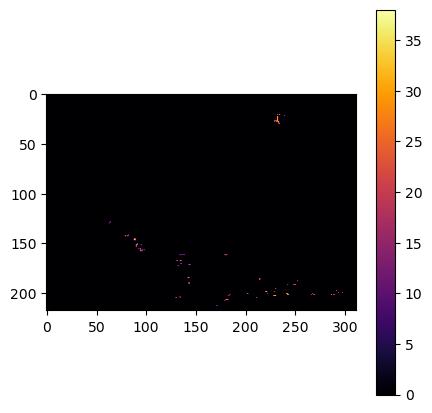

In [9]:
# paint changed terrain pixels
defecitOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_DEFICIT)
with GeoTiff.from_file(TERRAIN_CHANGED_DEFICIT) as terrain_changed:
    terrain_changed.draw_geotiff()

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<Figure size 500x500 with 0 Axes>

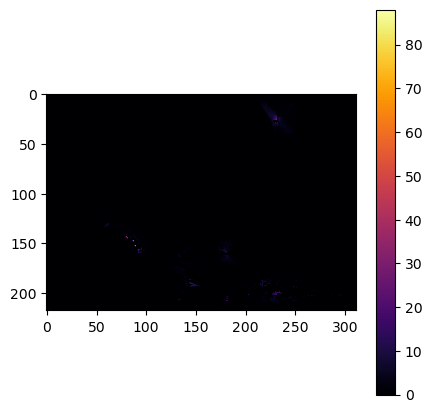

In [10]:
# view diff of before and after
defecitOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF_DEFECIT)
with GeoTiff.from_file(CONNECTIVITY_DIFF_DEFECIT) as connectivity_changed:
    connectivity_changed.draw_geotiff()

In [16]:
# probalistic deficit restoration
probalisticDefecitOptimizer.run_connectivity()
permiability_restored = probalisticDefecitOptimizer.restore()
probalisticDefecitOptimizer.run_connectivity(restored=True)
print(f"Delta connectivity: {probalisticDefecitOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {probalisticDefecitOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {probalisticDefecitOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 2576
Permiability Restored: 9.990861313868594
Percent connectivity changed: 0.0009565003967471561%
Connectivity/permiability_restored: 257.83562788767597


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<Figure size 500x500 with 0 Axes>

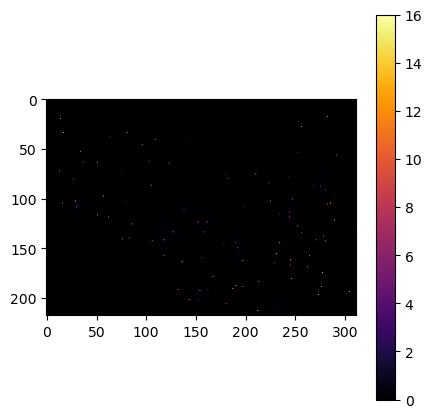

In [17]:
# paint changed terrain pixels
probalisticDefecitOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_PROBALISTIC)
with GeoTiff.from_file(TERRAIN_CHANGED_PROBALISTIC) as terrain_changed:
    terrain_changed.draw_geotiff()

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<Figure size 500x500 with 0 Axes>

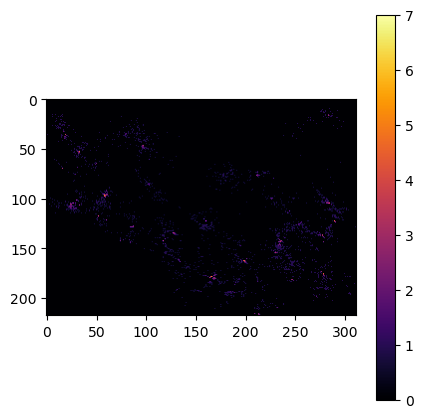

In [18]:
# view diff of before and after
probalisticDefecitOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF_PROBALISTIC)
with GeoTiff.from_file(CONNECTIVITY_DIFF_PROBALISTIC) as connectivity_changed:
    connectivity_changed.draw_geotiff()

Low Res Deficit Optimizer

In [3]:
lowResDefecitRestoration = lowResDefecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, LOW_RES_DEATH_PATH, PERMEABILITY_PATH, 2, 2, 50)

lowResDefecitRestoration.run_connectivity()
permiability_restored = lowResDefecitRestoration.restore()
lowResDefecitRestoration.run_connectivity(restored=True)
print(f"Delta connectivity: {defecitOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {defecitOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {defecitOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 6456
Permiability Restored: 19.854481751824824
Percent connectivity changed: 0.002397191988120978%
Connectivity/permiability_restored: 325.1658784499187


In [24]:
noisyOptimizer.run_connectivity()
noisyOptimizer.run_noisy_connectivity()
permiability_restored = noisyOptimizer.restore()
noisyOptimizer.run_connectivity(restored=True)
print(f"Delta connectivity: {noisyOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {noisyOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {noisyOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 1356
Permiability Restored: 36.277781022350354
Percent connectivity changed: 0.0004128372912637114%
Connectivity/permiability_restored: 37.37825086833681


In [26]:
# paint changed terrain pixels
noisyOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_NOISY)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [27]:
# view diff of before and after
noisyOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF_NOISY)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [28]:
# utopian restoration
utopianOptimizer.run_connectivity()
utopianOptimizer.run_utopian_connectivity()
permiability_restored = utopianOptimizer.restore()
utopianOptimizer.run_connectivity(restored=True)
print(f"Delta connectivity: {utopianOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {utopianOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {utopianOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


{(19, 4): 62, (235, 14): 60, (233, 23): 60, (228, 11): 59, (233, 13): 58, (230, 15): 58, (223, 13): 57, (230, 28): 57, (224, 12): 57, (226, 13): 57, (226, 14): 57, (119, 100): 57, (230, 16): 57, (226, 10): 57, (242, 164): 56, (230, 14): 56, (223, 10): 56, (182, 162): 56, (231, 12): 56, (245, 17): 56, (238, 13): 56, (229, 15): 56, (229, 14): 56, (122, 97): 56, (243, 159): 56, (121, 98): 56, (235, 28): 56, (195, 87): 56, (239, 23): 56, (283, 50): 56, (50, 97): 55, (209, 143): 55, (231, 17): 55, (156, 166): 55, (224, 11): 55, (223, 11): 55, (284, 51): 55, (238, 22): 55, (238, 24): 55, (227, 12): 55, (238, 23): 55, (10, 4): 55, (237, 23): 55, (225, 14): 54, (162, 162): 54, (48, 112): 54, (181, 161): 54, (175, 155): 54, (231, 15): 54, (242, 19): 54}


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 1118
Permiability Restored: 31.91635036510222
Percent connectivity changed: 0.0003403776486967768%
Connectivity/permiability_restored: 35.02906777281267


In [29]:
# paint changed terrain pixels
diff = utopianOptimizer.get_flow_diff()
highest_diff = utopianOptimizer.get_highest_diff_pixels(diff)
utopianOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_UTOPIAN, highest_diff)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [30]:
# view diff of before and after
utopianOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF_UTOPIAN)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


## Now with more pixels restored...

In [70]:
DATA_PATH="/Users/nvalett/Documents/Natalie/Species Dist Research/Thesis/EcoLinker/tests/assets"
HABITAT_PATH = os.path.join(DATA_PATH, "smol/hab_smol.tif")
TERRAIN_PATH = os.path.join(DATA_PATH, "smol/terrain.tif")
RESTORED_TERRAIN_PATH = os.path.join(DATA_PATH, "smol/restored_ter_smol.tif")
PERMEABILITY_PATH = os.path.join(DATA_PATH, "paper_repro/transmission_refined_1.csv")

CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop.tif")
NOISY_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop_noisy.tif")
UTOPIAN_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop_utopian.tif")
RESTORED_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop_after_restoration.tif")
FLOW_PATH = os.path.join(DATA_PATH, "smol/grad.tif")
NOISY_FLOW_PATH = os.path.join(DATA_PATH, "smol/grad_noisy.tif")
UTOPIAN_FLOW_PATH = os.path.join(DATA_PATH, "smol/grad_utopian.tif")
RESTORED_FLOW_PATH = os.path.join(DATA_PATH, "smol/grad_after_restoration.tif")
DEATH_PATH = os.path.join(DATA_PATH, "smol/death.tif")

# terrain changed tiffs
TERRAIN_CHANGED_DEFICIT = os.path.join(DATA_PATH, "smol/changed_terrain_defecit_250.tif")
TERRAIN_CHANGED_NOISY = os.path.join(DATA_PATH, "smol/changed_terrain_noisy_100.tif")
TERRAIN_CHANGED_UTOPIAN = os.path.join(DATA_PATH, "smol/changed_terrain_utopian_250.tif")
# changed connectivity
CONNECTIVITY_DIFF_DEFECIT = os.path.join(DATA_PATH, "smol/connectivity_diff_defecit_250.tif")
CONNECTIVITY_DIFF_NOISY = os.path.join(DATA_PATH, "smol/connectivity_diff_noisy_100.tif")
CONNECTIVITY_DIFF_UTOPIAN = os.path.join(DATA_PATH, "smol/connectivity_diff_utopian_250.tif")

defecitOptimizer = defecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 250)
noisyOptimizer = noisyDefecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 100, NOISY_CONNECTIVITY_PATH, NOISY_FLOW_PATH, rand_divisor=1)
utopianOptimizer = utopianRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 250, UTOPIAN_CONNECTIVITY_PATH, UTOPIAN_FLOW_PATH, permiability=1.0)

In [69]:
defecitOptimizer.run_connectivity()
permiability_restored = defecitOptimizer.restore()
defecitOptimizer.run_connectivity(restored=True)
print(f"Delta connectivity: {defecitOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {defecitOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {defecitOptimizer.get_delta_connectivity()/permiability_restored}")

# paint changed terrain pixels
defecitOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_DEFICIT)

# view diff of before and after
defecitOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF_DEFECIT)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 13359
Permiability Restored: 135.31962044291953
Percent connectivity changed: 0.004067178004418821%
Connectivity/permiability_restored: 98.72182582447523


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [39]:
noisyOptimizer.run_connectivity()
noisyOptimizer.run_noisy_connectivity()
permiability_restored = noisyOptimizer.restore()
noisyOptimizer.run_connectivity(restored=True)
print(f"Delta connectivity: {noisyOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {noisyOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {noisyOptimizer.get_delta_connectivity()/permiability_restored}")

# paint changed terrain pixels
noisyOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_NOISY)

# view diff of before and after
noisyOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF_NOISY)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 2328
Permiability Restored: 72.68116788502192
Percent connectivity changed: 0.0007087649071253098%
Connectivity/permiability_restored: 32.03030534240703


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [71]:
# utopian restoration
utopianOptimizer.run_connectivity()
utopianOptimizer.run_utopian_connectivity()
permiability_restored = utopianOptimizer.restore()
utopianOptimizer.run_connectivity(restored=True)
print(f"Delta connectivity: {utopianOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {utopianOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {utopianOptimizer.get_delta_connectivity()/permiability_restored}")

# paint changed terrain pixels
diff = utopianOptimizer.get_flow_diff()
highest_diff = utopianOptimizer.get_highest_diff_pixels(diff)
utopianOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_UTOPIAN, highest_diff)

# view diff of before and after
utopianOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF_UTOPIAN)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


{(19, 4): 62, (233, 23): 60, (235, 14): 60, (228, 11): 59, (233, 13): 58, (230, 15): 58, (226, 10): 57, (230, 28): 57, (119, 100): 57, (224, 12): 57, (226, 14): 57, (226, 13): 57, (223, 13): 57, (230, 16): 57, (245, 17): 56, (229, 15): 56, (122, 97): 56, (239, 23): 56, (121, 98): 56, (230, 14): 56, (229, 14): 56, (238, 13): 56, (242, 164): 56, (182, 162): 56, (231, 12): 56, (235, 28): 56, (223, 10): 56, (195, 87): 56, (243, 159): 56, (283, 50): 56, (231, 17): 55, (50, 97): 55, (156, 166): 55, (10, 4): 55, (284, 51): 55, (209, 143): 55, (223, 11): 55, (238, 24): 55, (224, 11): 55, (238, 22): 55, (227, 12): 55, (238, 23): 55, (237, 23): 55, (175, 155): 54, (222, 141): 54, (231, 15): 54, (227, 10): 54, (225, 10): 54, (224, 10): 54, (145, 168): 54, (242, 19): 54, (225, 14): 54, (234, 22): 54, (226, 11): 54, (224, 9): 54, (162, 162): 54, (48, 112): 54, (225, 11): 54, (225, 12): 54, (68, 48): 54, (261, 30): 54, (181, 161): 54, (152, 160): 54, (42, 17): 54, (227, 16): 54, (227, 11): 54, (227,

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 6387
Permiability Restored: 137.45369343274425
Percent connectivity changed: 0.0019445367103992069%
Connectivity/permiability_restored: 46.466557867542086


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


## Test corridor

In [64]:
# xys = [(235, 67), (234, 67), (236, 67), (235, 66), (235, 68), (234, 66), (236, 68), (235, 69), (229, 71)]
defecitOptimizer2 = defecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 250)

# reset restored terrain tif
current_terr_tile = GeoTiff.from_file(defecitOptimizer2.terrain_fn).get_all_as_tile()
with GeoTiff.from_file(defecitOptimizer2.restored_terr_fn) as restored_terr:
    restored_terr.set_tile(current_terr_tile)

xys = {}
for rows in range(45, 100, 5):
    for cols in range(238, 245, 2):
        xys[(cols, rows)] = 1

print(len(xys))

defecitOptimizer2.run_connectivity()
permiability_change = 0
for x, y in xys.keys():
    permiability_change += defecitOptimizer2.change_terrain(x, y)
defecitOptimizer2.run_connectivity(restored=True)
print(f"Delta connectivity: {defecitOptimizer2.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_change}")
print(f"Percent connectivity changed: {defecitOptimizer2.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {defecitOptimizer2.get_delta_connectivity()/permiability_change}")

44


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 77
Permiability Restored: 3.700000000000002
Percent connectivity changed: 2.344282553636119e-05%
Connectivity/permiability_restored: 20.8108108108108


In [61]:
# paint changed terrain pixels
defecitOptimizer2.paint_changed_terrain_geotiff(TERRAIN_CHANGED_DEFICIT, changed_pixels=xys)

# view diff of before and after
defecitOptimizer2.get_connectivity_difference_tif(CONNECTIVITY_DIFF_DEFECIT)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
